<div style="display: flex; background-color: RGB(72,209,204);" >
<h1 style="margin: auto; padding: 30px; ">Brief6 - Dessine-moi les JO </h1>
</div>

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 1 </h1>
</div>

In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns




In [109]:
#lecture fichier csv
medal = pd.read_csv('olympic_medals.csv')
host = pd.read_csv('olympic_hosts.csv')
resultat = pd.read_csv('olympic_results.csv')
athlete = pd.read_csv('olympic_athletes.csv')
ete = host[host["game_season"]=="Summer"]
ete.head()


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004


In [128]:
medal.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [110]:
#merge de medal et de host car besoin de la colonne medal_type et game_year
medal_host = medal.merge(host, how='left', left_on='slug_game', right_on='game_slug')
medal_host = medal_host[medal_host["game_season"] == "Summer"]
medal_host = medal_host[medal_host["country_name"] == "Australia"]
medal_host = medal_host[medal_host["participant_type"] == "Athlete"]

medal_host

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
437,Diving,tokyo-2020,Women's 10m Platform,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/melissa-wu,Melissa WU,Australia,AU,AUS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
500,Cycling Road,tokyo-2020,Men's Individual Time Trial,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohan-dennis,Rohan DENNIS,Australia,AU,AUS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
560,Boxing,tokyo-2020,Men's Light (57-63kg),Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/harrison-garside,Harrison GARSIDE,Australia,AU,AUS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
603,Surfing,tokyo-2020,Men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/owen-wright,Owen Wright,Australia,AU,AUS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
626,Canoe Slalom,tokyo-2020,Women's Canoe,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/jessica-fox,Jessica FOX,Australia,AU,AUS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21416,Athletics,paris-1900,60m men,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/stanley-rowley,Stanley ROWLEY,Australia,AU,AUS,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900
21555,Swimming,paris-1900,200m freestyle men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/frederick-c-v...,Frederick C.V. LANE,Australia,AU,AUS,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900
21561,Swimming,paris-1900,200m obstacle event men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/frederick-c-v...,Frederick C.V. LANE,Australia,AU,AUS,paris-1900,1900-10-28T19:50:39Z,1900-05-14T08:50:39Z,France,Paris 1900,Summer,1900
21587,Athletics,athens-1896,1500m men,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/edwin-flack,Edwin FLACK,Australia,AU,AUS,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896


In [111]:
#permet de créer un tableau avec les medailles gagner pas années
medal_annee = medal_host.groupby(by=["game_year"]).size().reset_index(name='medal')
medal_annee

#.iloc[1::2]#silising permet de couper en 3 partie donc 1 prend la premier valeur ::la deuxieme la fin et la 3eme tout les combiens

,game_year,medal
0,1896,2
1,1900,5
2,1904,4
3,1920,2
4,1924,5
5,1928,4
6,1932,5
7,1936,1
8,1948,12
9,1952,9


<AxesSubplot:xlabel='game_year', ylabel='medal'>

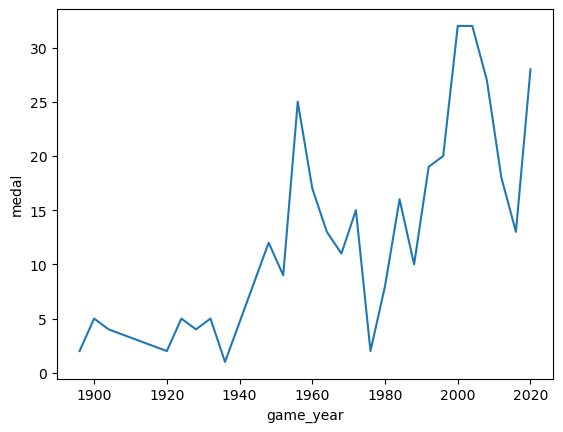

In [112]:
sns.lineplot(data=medal_annee, y="medal", x="game_year")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 2 </h1>
</div>

In [115]:
#une courbe qui répresente le nombre d'athlètes engagés au cours du temps, au total et par sexe
resultat_host = resultat.merge(host, how='left', left_on='slug_game', right_on='game_slug')
resultat_host.head()





,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


In [116]:
medal_resultat_host = medal.merge(resultat_host, how='outer')
medal_resultat_host = medal_resultat_host[medal_resultat_host["game_season"] == "Summer"]
medal_resultat_host = medal_resultat_host[medal_resultat_host["country_name"] == "Australia"]
#medal_resultat_host = medal_resultat_host[medal_resultat_host["participant_type"] == "Athlete"]

medal_resultat_host.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,...,rank_position,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
437,Diving,tokyo-2020,Women's 10m Platform,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/melissa-wu,Melissa WU,Australia,...,3,371.40,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
500,Cycling Road,tokyo-2020,Men's Individual Time Trial,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohan-dennis,Rohan DENNIS,Australia,...,3,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
560,Boxing,tokyo-2020,Men's Light (57-63kg),Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/harrison-garside,Harrison GARSIDE,Australia,...,3,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
626,Canoe Slalom,tokyo-2020,Women's Canoe,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/jessica-fox,Jessica FOX,Australia,...,1,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
630,Canoe Slalom,tokyo-2020,Women's Kayak,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/jessica-fox,Jessica FOX,Australia,...,3,106.73,TIME,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0


In [117]:
#regoupe tous les athletes
athl = medal_resultat_host.groupby(by=["game_year"]).size().reset_index(name='athletes')#sinon peut faire un.count().athlete_full_name
athl

,game_year,athletes
0,1896.0,4
1,1900.0,7
2,1904.0,8
3,1908.0,4
4,1920.0,10
5,1924.0,24
6,1928.0,13
7,1932.0,14
8,1936.0,20
9,1948.0,54


In [118]:
medal_men = medal_resultat_host[medal_resultat_host["event_gender"] == "Men"]
medal_men.head()

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,...,rank_position,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
500,Cycling Road,tokyo-2020,Men's Individual Time Trial,Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/rohan-dennis,Rohan DENNIS,Australia,...,3,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
560,Boxing,tokyo-2020,Men's Light (57-63kg),Men,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/harrison-garside,Harrison GARSIDE,Australia,...,3,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
655,Basketball,tokyo-2020,Men,Men,BRONZE,GameTeam,Australia,NaN,NaN,Australia,...,3,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
711,Cycling Track,tokyo-2020,Men's Team Pursuit,Men,BRONZE,GameTeam,Australia,NaN,NaN,Australia,...,3,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
956,Cycling BMX Freestyle,tokyo-2020,Men's Park,Men,GOLD,Athlete,NaN,https://olympics.com/en/athletes/logan-martin,Logan MARTIN,Australia,...,1,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0


In [119]:
men = medal_men.groupby(by=["game_year"]).size().reset_index(name='athletes')
men

,game_year,athletes
0,1896.0,2
1,1900.0,5
2,1920.0,3
3,1924.0,6
4,1928.0,4
5,1932.0,3
6,1936.0,1
7,1948.0,8
8,1952.0,6
9,1956.0,17


In [120]:
medal_women = medal_resultat_host[medal_resultat_host["event_gender"] == "Women"]
medal_women

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,...,rank_position,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
437,Diving,tokyo-2020,Women's 10m Platform,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/melissa-wu,Melissa WU,Australia,...,3,371.40,POINTS,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
626,Canoe Slalom,tokyo-2020,Women's Canoe,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/jessica-fox,Jessica FOX,Australia,...,1,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
630,Canoe Slalom,tokyo-2020,Women's Kayak,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/jessica-fox,Jessica FOX,Australia,...,3,106.73,TIME,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
637,Marathon Swimming,tokyo-2020,Women's 10km,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/kareena-lee,Kareena LEE,Australia,...,3,1:59:32.5,TIME,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
1148,Athletics,tokyo-2020,Women's Javelin Throw,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/kelsey-lee-ro...,Kelsey-Lee ROBERTS,Australia,...,3,62.59,DISTANCE,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18023,Athletics,london-1948,100m women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/shirley-stric...,Shirley STRICKLAND-DE LA HUNTY,Australia,...,3,12200,TIME,london-1948,1948-08-14T19:00:00Z,1948-07-29T07:00:00Z,Great Britain,London 1948,Summer,1948.0
18046,Athletics,london-1948,4x100m relay women,Women,SILVER,GameTeam,Australia team,NaN,NaN,Australia,...,2,47600,TIME,london-1948,1948-08-14T19:00:00Z,1948-07-29T07:00:00Z,Great Britain,London 1948,Summer,1948.0
18059,Athletics,london-1948,80m hurdles women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/shirley-stric...,Shirley STRICKLAND-DE LA HUNTY,Australia,...,3,11400,TIME,london-1948,1948-08-14T19:00:00Z,1948-07-29T07:00:00Z,Great Britain,London 1948,Summer,1948.0
18891,Swimming,los-angeles-1932,200m breaststroke women,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/clare-dennis,Clare DENNIS,Australia,...,1,186300,TIME,los-angeles-1932,1932-08-14T19:00:00Z,1932-07-30T16:00:00Z,United States,Los Angeles 1932,Summer,1932.0


In [121]:
women = medal_women.groupby(by=["game_year"]).size().reset_index(name='athletes')
women

,game_year,athletes
0,1932.0,2
1,1948.0,5
2,1952.0,4
3,1956.0,13
4,1960.0,5
5,1964.0,7
6,1968.0,7
7,1972.0,10
8,1980.0,2
9,1984.0,7


In [122]:
medal_NaN = medal_resultat_host[medal_resultat_host["event_gender"].isna()]
medal_NaN

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,...,rank_position,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
25202,Shooting,tokyo-2020,Trap Mixed Team,NaN,NaN,GameTeam,NaN,NaN,NaN,Australia,...,6,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
25203,Shooting,tokyo-2020,Trap Mixed Team,NaN,NaN,GameTeam,NaN,NaN,NaN,Australia,...,7,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
25236,Shooting,tokyo-2020,50m Rifle 3 Positions women,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/katarina-rose...,Katarina Rose KOWPLOS,Australia,...,36,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
25255,Shooting,tokyo-2020,50m Rifle 3 Positions Men,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/dane-sampson,Dane SAMPSON,Australia,...,27,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
25276,Shooting,tokyo-2020,50m Rifle 3 Positions Men,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/jack-rossiter,Jack ROSSITER,Australia,...,29,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165383,Athletics,athens-1896,marathon men,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/edwin-flack,Edwin FLACK,Australia,...,DNF,NaN,IRM,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896.0
165728,Tennis,athens-1896,Singles men,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/edwin-flack,Edwin FLACK,Australia,...,8,NaN,NaN,athens-1896,1896-04-15T11:39:39Z,1896-04-06T11:38:39Z,Greece,Athens 1896,Summer,1896.0
165842,Equestrian Jumping,montreal-1976,Jumping Individual mixed,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/guy-creighton,Guy CREIGHTON,Australia,...,5,12.00,POINTS,montreal-1976,1976-07-31T22:00:00Z,1976-07-17T12:00:00Z,Canada,Montreal 1976,Summer,1976.0
165874,Equestrian Jumping,montreal-1976,Jumping Individual mixed,NaN,NaN,Athlete,NaN,https://olympics.com/en/athletes/kevin-ashley-...,Kevin Ashley BACON,Australia,...,37,NaN,NaN,montreal-1976,1976-07-31T22:00:00Z,1976-07-17T12:00:00Z,Canada,Montreal 1976,Summer,1976.0


In [123]:
NaN = medal_NaN.groupby(by=["game_year"]).size().reset_index(name='athletes')
NaN

,game_year,athletes
0,1896.0,2
1,1900.0,2
2,1904.0,8
3,1908.0,4
4,1920.0,7
5,1924.0,18
6,1928.0,9
7,1932.0,9
8,1936.0,19
9,1948.0,41


<AxesSubplot:xlabel='game_year', ylabel='athletes'>

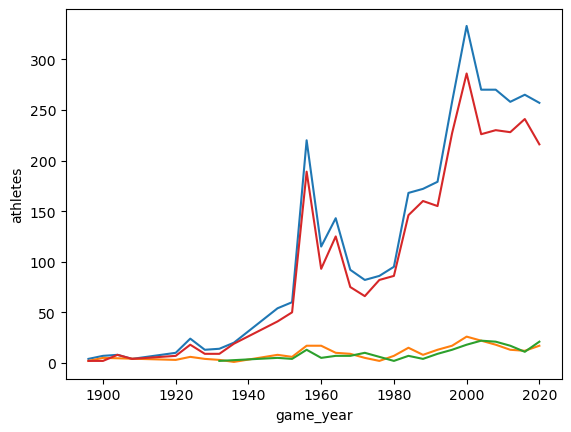

In [124]:
sns.lineplot(data=athl, y="athletes", x="game_year")#bleu
sns.lineplot(data=men, y="athletes", x="game_year")#orange
sns.lineplot(data=women, y="athletes", x="game_year")#vert
sns.lineplot(data=NaN, y="athletes", x="game_year")#rouge

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 3 </h1>
</div>
un histogramme qui représente la distribution de l'âge des participants pour toutes les éditions


In [78]:
ete.head()


,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004


In [125]:
final_athlete = resultat[resultat['participant_type']=='Athlete']
final_athlete.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
30,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,NaN,False,6,Australia,AU,AUS,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,76.74,POINTS
31,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,NaN,False,17,Sweden,SE,SWE,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,78.87,POINTS
32,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,NaN,False,16,United States of America,US,USA,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,75.86,POINTS
33,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,NaN,False,19,Finland,FI,FIN,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,75.95,POINTS
34,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,NaN,NaN,False,8,Kazakhstan,KZ,KAZ,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,75.43,POINTS


In [80]:

df_athlete = final_athlete.merge(ete, how='right', left_on='slug_game', right_on='game_slug')
df_athlete = df_athlete[df_athlete['country_name']=='Australia']
df_athlete.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
26,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,NaN,NaN,False,36,Australia,AU,...,Katarina Rose KOWPLOS,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
48,Shooting,50m Rifle 3 Positions Men,tokyo-2020,Athlete,NaN,NaN,False,27,Australia,AU,...,Dane SAMPSON,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
70,Shooting,50m Rifle 3 Positions Men,tokyo-2020,Athlete,NaN,NaN,False,29,Australia,AU,...,Jack ROSSITER,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
83,Shooting,25m Rapid Fire Pistol Men,tokyo-2020,Athlete,NaN,NaN,False,17,Australia,AU,...,Sergei EVGLEVSKI,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
110,Shooting,10m Air Rifle Men,tokyo-2020,Athlete,NaN,NaN,False,30,Australia,AU,...,Dane SAMPSON,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020


In [81]:
df_athlete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811 entries, 26 to 101708
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   discipline_title       2811 non-null   object
 1   event_title            2811 non-null   object
 2   slug_game              2811 non-null   object
 3   participant_type       2811 non-null   object
 4   medal_type             354 non-null    object
 5   athletes               0 non-null      object
 6   rank_equal             678 non-null    object
 7   rank_position          2727 non-null   object
 8   country_name           2811 non-null   object
 9   country_code           2811 non-null   object
 10  country_3_letter_code  2811 non-null   object
 11  athlete_url            2664 non-null   object
 12  athlete_full_name      2811 non-null   object
 13  value_unit             1300 non-null   object
 14  value_type             1463 non-null   object
 15  game_slug         

In [82]:
df_reesult = df_athlete.merge(athlete,how='inner')
df_reesult.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,game_start_date,game_location,game_name,game_season,game_year,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,NaN,NaN,False,36,Australia,AU,...,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,1,Tokyo 2020,2001.0,NaN,NaN
1,Shooting,10m Air Rifle women,tokyo-2020,Athlete,NaN,NaN,False,45,Australia,AU,...,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,1,Tokyo 2020,2001.0,NaN,NaN
2,Shooting,50m Rifle 3 Positions Men,tokyo-2020,Athlete,NaN,NaN,False,27,Australia,AU,...,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,3,London 2012,1986.0,NaN,NaN
3,Shooting,10m Air Rifle Men,tokyo-2020,Athlete,NaN,NaN,False,30,Australia,AU,...,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,3,London 2012,1986.0,NaN,NaN
4,Shooting,50m rifle 3 positions 3x40 shots men,rio-2016,Athlete,NaN,NaN,NaN,20,Australia,AU,...,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016,3,London 2012,1986.0,NaN,NaN


In [83]:
df_all_result = df_reesult.assign(Age = lambda x: (x["game_year"] - x["athlete_year_birth"]))
df_all_result.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,game_location,game_name,game_season,game_year,games_participations,first_game,athlete_year_birth,athlete_medals,bio,Age
0,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,NaN,NaN,False,36,Australia,AU,...,Japan,Tokyo 2020,Summer,2020,1,Tokyo 2020,2001.0,NaN,NaN,19.0
1,Shooting,10m Air Rifle women,tokyo-2020,Athlete,NaN,NaN,False,45,Australia,AU,...,Japan,Tokyo 2020,Summer,2020,1,Tokyo 2020,2001.0,NaN,NaN,19.0
2,Shooting,50m Rifle 3 Positions Men,tokyo-2020,Athlete,NaN,NaN,False,27,Australia,AU,...,Japan,Tokyo 2020,Summer,2020,3,London 2012,1986.0,NaN,NaN,34.0
3,Shooting,10m Air Rifle Men,tokyo-2020,Athlete,NaN,NaN,False,30,Australia,AU,...,Japan,Tokyo 2020,Summer,2020,3,London 2012,1986.0,NaN,NaN,34.0
4,Shooting,50m rifle 3 positions 3x40 shots men,rio-2016,Athlete,NaN,NaN,NaN,20,Australia,AU,...,Brazil,Rio 2016,Summer,2016,3,London 2012,1986.0,NaN,NaN,30.0


<AxesSubplot:xlabel='Age', ylabel='Count'>

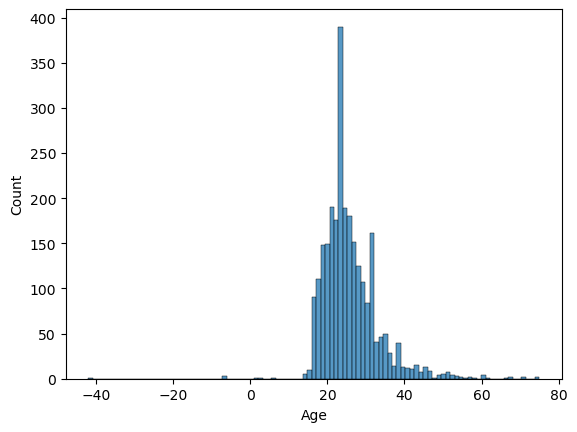

In [84]:
sns.histplot(data=df_all_result, x="Age")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 4 </h1>
</div>
un diagramme en bâtons qui représente le nombre de médailles gagnées pour chacun des 10 sportifs ayant gagné le plus de médailles


In [126]:
medals_aus = medal[medal["country_name"] == "Australia"]
country_medal = medals_aus.groupby(['athlete_full_name']).count()
medall = country_medal.sort_values(by='medal_type',ascending=False)
top_10 = medall.head(10)
top_10.reset_index(inplace = True)

In [105]:
top_10

,athlete_full_name,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,country_name,country_code,country_3_letter_code
0,Anna MEARES,6,6,6,6,6,6,1,6,6,6,6
1,Shane GOULD,5,5,5,5,5,5,0,5,5,5,5
2,Ian THORPE,5,5,5,5,5,5,0,5,5,5,5
3,Shirley STRICKLAND-DE LA HUNTY,5,5,5,5,5,5,0,5,5,5,5
4,Leisel JONES,5,5,5,5,5,5,0,5,5,5,5
5,Murray ROSE,4,4,4,4,4,4,0,4,4,4,4
6,Jared TALLENT,4,4,4,4,4,4,0,4,4,4,4
7,Emma MCKEON,4,4,4,4,4,4,0,4,4,4,4
8,Francis GAILEY,4,4,4,4,4,4,0,4,4,4,4
9,Susan O'NEILL,4,4,4,4,4,4,0,4,4,4,4


<AxesSubplot:xlabel='medal_type', ylabel='athlete_full_name'>

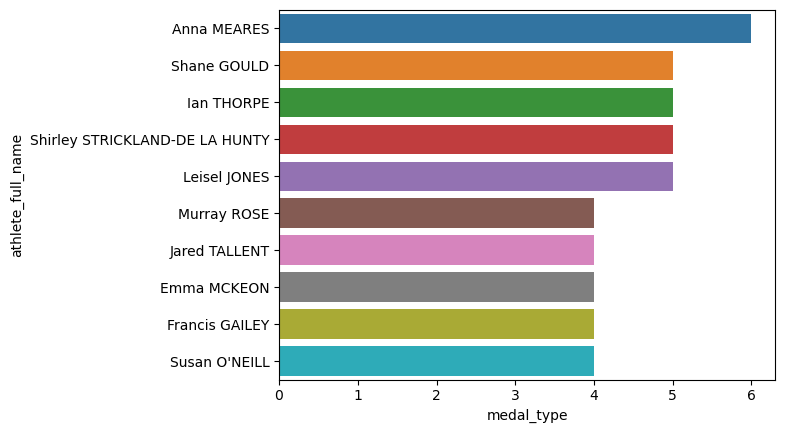

In [107]:
sns.barplot(y = 'athlete_full_name', x = 'medal_type', data = top_10)

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 5 </h1>
</div>
pour l'athlète ayant remporté le plus de médailles, une courbe qui représente l'évolution de sa place sur chacune des marches du podium en fonction de son âge


In [131]:
ete

,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
1,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020
3,rio-2016,2016-08-21T21:00:00Z,2016-08-05T12:00:00Z,Brazil,Rio 2016,Summer,2016
5,london-2012,2012-08-12T19:00:00Z,2012-07-27T07:00:00Z,Great Britain,London 2012,Summer,2012
7,beijing-2008,2008-08-24T12:00:00Z,2008-08-08T00:00:00Z,China,Beijing 2008,Summer,2008
9,athens-2004,2004-08-29T18:00:00Z,2004-08-13T06:00:00Z,Greece,Athens 2004,Summer,2004
11,sydney-2000,2000-10-01T09:00:00Z,2000-09-15T01:00:00Z,Australia,Sydney 2000,Summer,2000
13,atlanta-1996,1996-08-05T21:00:00Z,1996-07-19T12:00:00Z,United States,Atlanta 1996,Summer,1996
15,barcelona-1992,1992-08-09T18:00:00Z,1992-07-25T06:00:00Z,Spain,Barcelona 1992,Summer,1992
17,seoul-1988,1988-10-02T10:00:00Z,1988-09-16T22:00:00Z,Republic of Korea,Seoul 1988,Summer,1988
19,los-angeles-1984,1984-08-12T19:00:00Z,1984-07-28T15:00:00Z,United States,Los Angeles 1984,Summer,1984


In [134]:

df_all_medals = medal.merge(athlete, how='left', left_on='athlete_full_name', right_on='athlete_full_name')
df_all_medals= df_all_medals[df_all_medals['country_name']=='Australia']
df_all_medals= df_all_medals[df_all_medals["athlete_full_name"] == "Anna MEARES"]
df_all_medals.head()



,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url_x,athlete_full_name,country_name,country_code,country_3_letter_code,athlete_url_y,games_participations,first_game,athlete_year_birth,athlete_medals,bio
2039,Cycling Track,rio-2016,Keirin women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,AU,AUS,https://olympics.com/en/athletes/anna-meares,4.0,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...
4272,Cycling Track,london-2012,sprint women,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,AU,AUS,https://olympics.com/en/athletes/anna-meares,4.0,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...
4287,Cycling Track,london-2012,Team sprint women,Women,BRONZE,GameTeam,Australia team,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,AU,AUS,https://olympics.com/en/athletes/anna-meares,4.0,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...
5493,Cycling Track,beijing-2008,sprint women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,AU,AUS,https://olympics.com/en/athletes/anna-meares,4.0,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...
6319,Cycling Track,athens-2004,sprint women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,AU,AUS,https://olympics.com/en/athletes/anna-meares,4.0,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...


In [ ]:
df_all_medals1 =df_all_medals.merge(resultat)
df_all_medals1.head()


,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url_x,athlete_full_name,country_name,...,first_game,athlete_year_birth,athlete_medals,bio,athletes,rank_equal,rank_position,athlete_url,value_unit,value_type
0,Freestyle Skiing,beijing-2022,Women's Moguls,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anthony,Jakara ANTHONY,Australia,...,PyeongChang 2018,1998.0,\n\n\n1\n\nG\n\n,NaN,NaN,False,1,https://olympics.com/en/athletes/anthony,83.75,POINTS
1,Snowboard,beijing-2022,Men's Snowboard Halfpipe,Men,SILVER,Athlete,NaN,https://olympics.com/en/athletes/scotty-james,Scotty JAMES,Australia,...,Vancouver 2010,1994.0,\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,NaN,NaN,False,2,https://olympics.com/en/athletes/scotty-james,91.25,POINTS
2,Snowboard,beijing-2022,Women's Snowboard Slopestyle,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/tess-coady,Tess COADY,Australia,...,Beijing 2022,2000.0,\n\n\n1\n\nB\n\n,NaN,NaN,False,3,https://olympics.com/en/athletes/tess-coady,71.13,POINTS
3,Skeleton,beijing-2022,Women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/jackie-narracott,Jackie NARRACOTT,Australia,...,PyeongChang 2018,1990.0,\n\n\n1\n\nS\n\n,NaN,NaN,False,2,https://olympics.com/en/athletes/jackie-narracott,4:08.24,TIME
4,Diving,tokyo-2020,Women's 10m Platform,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/melissa-wu,Melissa WU,Australia,...,Beijing 2008,1992.0,\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n,NaN,NaN,False,3,https://olympics.com/en/athletes/melissa-wu,371.40,POINTS


In [ ]:
df_l = df_all_medals1[df_all_medals1["athlete_full_name"] == "Anna MEARES"]
rank_po = df_l.rank_position.tolist()
df_l

,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url_x,athlete_full_name,country_name,...,first_game,athlete_year_birth,athlete_medals,bio,athletes,rank_equal,rank_position,athlete_url,value_unit,value_type
52,Cycling Track,rio-2016,Keirin women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,...,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...,NaN,NaN,3,https://olympics.com/en/athletes/anna-meares,NaN,NaN
101,Cycling Track,london-2012,sprint women,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,...,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...,NaN,NaN,1,https://olympics.com/en/athletes/anna-meares,NaN,NaN
125,Cycling Track,beijing-2008,sprint women,Women,SILVER,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,...,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...,NaN,NaN,2,https://olympics.com/en/athletes/anna-meares,NaN,NaN
165,Cycling Track,athens-2004,sprint women,Women,BRONZE,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,...,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...,NaN,NaN,3,https://olympics.com/en/athletes/anna-meares,NaN,NaN
166,Cycling Track,athens-2004,500m time trial women,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anna-meares,Anna MEARES,Australia,...,Athens 2004,1983.0,\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n,\n\n\nThe most successful female track cyclist...,NaN,NaN,1,https://olympics.com/en/athletes/anna-meares,33952,TIME


In [ ]:
df_l = df_l.assign(Age = lambda x: (x["game_year"] - x["athlete_year_birth"]))


<AxesSubplot:xlabel='Age', ylabel='medal_type'>

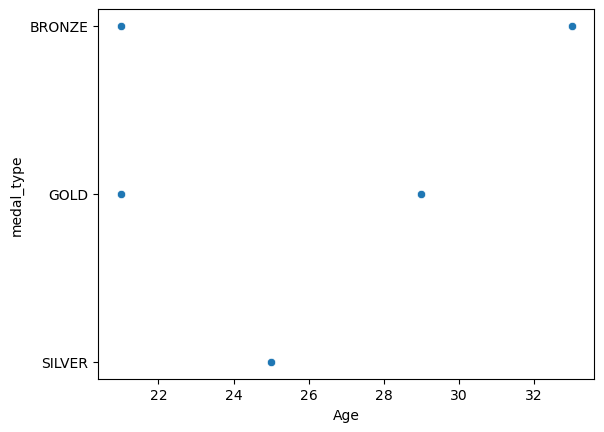

In [ ]:
sns.scatterplot(data=df_l, x="Age", y="medal_type")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 6 </h1>
</div>

In [135]:
# Q 6 :un nuage de point qui représente le nombre de médailles gagnées en fonction du nombre de participants engagés
athl_med= athl.assign(medal_tot = medal_annee.medal)
athl_med

,game_year,athletes,medal_tot
0,1896.0,4,2.0
1,1900.0,7,5.0
2,1904.0,8,4.0
3,1908.0,4,2.0
4,1920.0,10,5.0
5,1924.0,24,4.0
6,1928.0,13,5.0
7,1932.0,14,1.0
8,1936.0,20,12.0
9,1948.0,54,9.0


<AxesSubplot:xlabel='medal_tot', ylabel='athletes'>

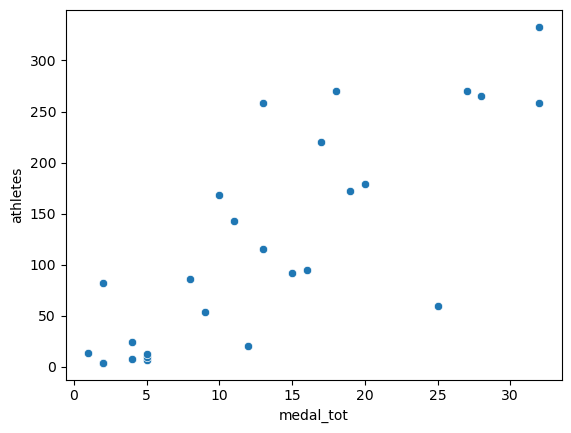

In [136]:
sns.scatterplot(data=athl_med, y="athletes", x="medal_tot")


<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 7 </h1>
</div>

In [137]:
#Q7: une carte de chaleur qui représente le nombre d'athlètes engagés par sport (en vertical) au cours du temps(en horizontal)
print(resultat_host[['discipline_title','game_year']])

           discipline_title  game_year
0                   Curling       2022
1                   Curling       2022
2                   Curling       2022
3                   Curling       2022
4                   Curling       2022
...                     ...        ...
162799          Ski Jumping       1924
162800          Ski Jumping       1924
162801          Ski Jumping       1924
162802          Ski Jumping       1924
162803  Gymnastics Artistic       1900

[162804 rows x 2 columns]


In [145]:
ath_per_sport = medal_resultat_host.groupby(by=["discipline_title","game_year"]).size().reset_index(name='athletes')
ath_per_sport
#df.groupby(['col5','col2']).reset_index()
ath1=ath_per_sport.copy()
ath1.dropna()
print(ath1)

    discipline_title  game_year  athletes
0            Archery     1972.0         3
1            Archery     1976.0         4
2            Archery     1980.0         3
3            Archery     1984.0         2
4            Archery     1988.0         4
..               ...        ...       ...
516        Wrestling     2000.0        11
517        Wrestling     2004.0         1
518        Wrestling     2008.0         4
519        Wrestling     2012.0         1
520        Wrestling     2016.0         3

[521 rows x 3 columns]


<AxesSubplot:xlabel='game_year', ylabel='discipline_title'>

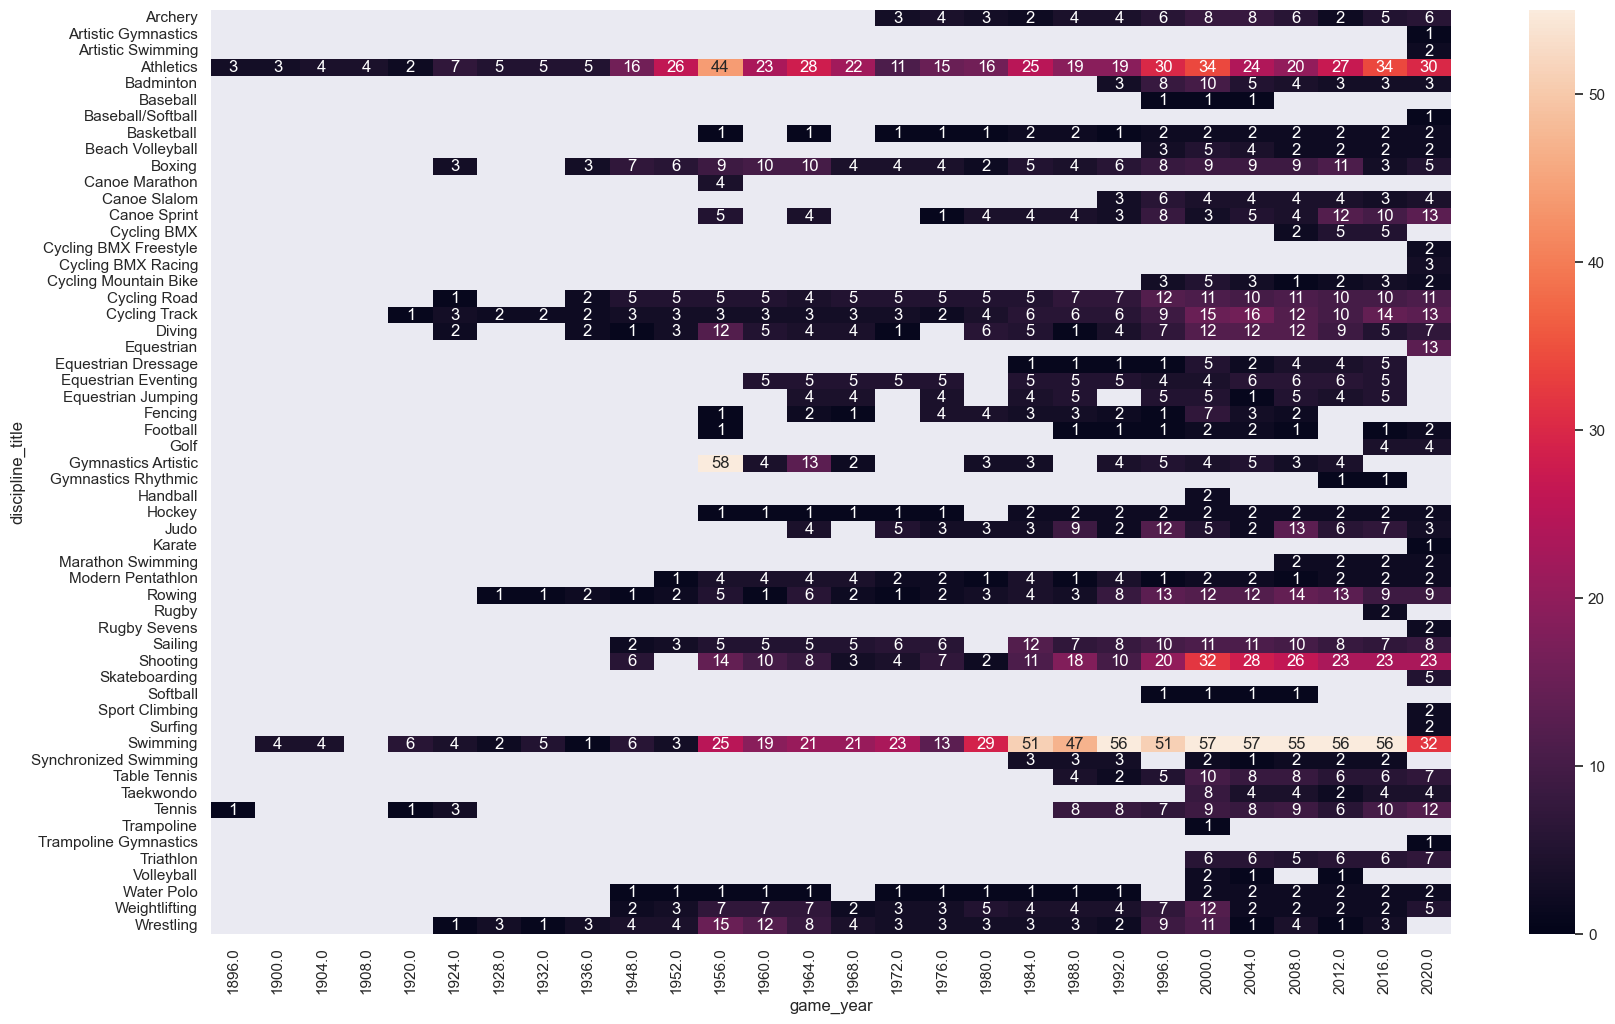

In [146]:
fli =ath_per_sport.pivot("discipline_title","game_year","athletes")
sns.set(rc = {'figure.figsize':(20,12)})
sns.heatmap(fli, annot=True, vmin=0, vmax=55)

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 8 </h1>
</div>

In [141]:
resultat_host.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,athlete_full_name,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,Curling,Mixed Doubles,beijing-2022,GameTeam,GOLD,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
1,Curling,Mixed Doubles,beijing-2022,GameTeam,SILVER,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
2,Curling,Mixed Doubles,beijing-2022,GameTeam,BRONZE,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
3,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022
4,Curling,Mixed Doubles,beijing-2022,GameTeam,NaN,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,...,NaN,NaN,NaN,beijing-2022,2022-02-20T12:00:00Z,2022-02-04T15:00:00Z,China,Beijing 2022,Winter,2022


In [142]:
rp =resultat_host.copy()
#Codage des pays
def tran_cat_to_num(rp):
    if rp['country_code'] == 'AU':
        return ("Australia")
    else:
        return ("Other")
        
#crée la colonne et application de la fonction sur toute les lignes
rp['country_new']=rp.apply(tran_cat_to_num,axis=1)
rp = rp[rp["game_season"] == "Summer"]


#Selection du podium 
liste=["1","2","3"]
rank=rp.loc[rp['rank_position'].isin(liste)]
rank.head()

,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,...,value_unit,value_type,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,country_new
3784,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,GOLD,"[('Fatima GALVEZ', 'https://olympics.com/en/at...",False,1,Spain,ES,...,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Other
3785,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,SILVER,"[('Alessandra PERILLI', 'https://olympics.com/...",False,2,San Marino,SM,...,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Other
3786,Shooting,Trap Mixed Team,tokyo-2020,GameTeam,BRONZE,"[('Madelynn Ann BERNAU', 'https://olympics.com...",False,3,United States of America,US,...,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Other
3803,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,BRONZE,NaN,False,3,ROC,ROC,...,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Other
3805,Shooting,50m Rifle 3 Positions women,tokyo-2020,Athlete,GOLD,NaN,False,1,Switzerland,CH,...,NaN,NaN,tokyo-2020,2021-08-08T14:00:00Z,2021-07-23T11:00:00Z,Japan,Tokyo 2020,Summer,2020,Other


<AxesSubplot:xlabel='country_new', ylabel='count'>

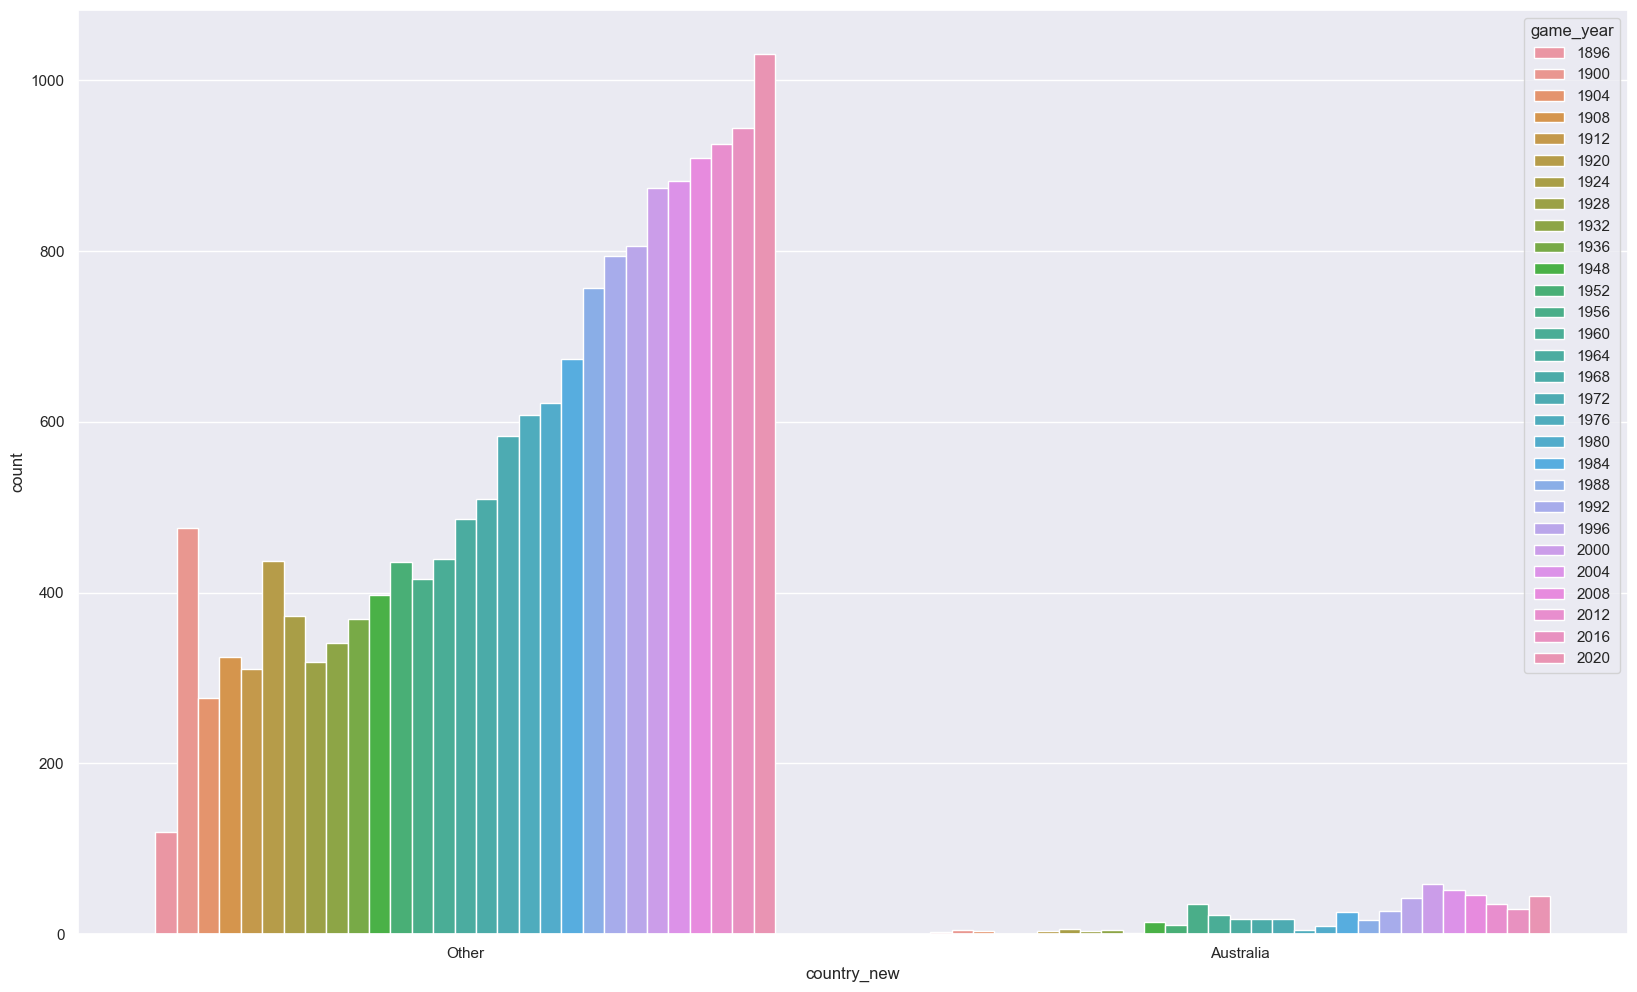

In [143]:
#test Q8
sns.countplot(data=rank, x="country_new", hue="game_year")

<AxesSubplot:xlabel='country_new', ylabel='count'>

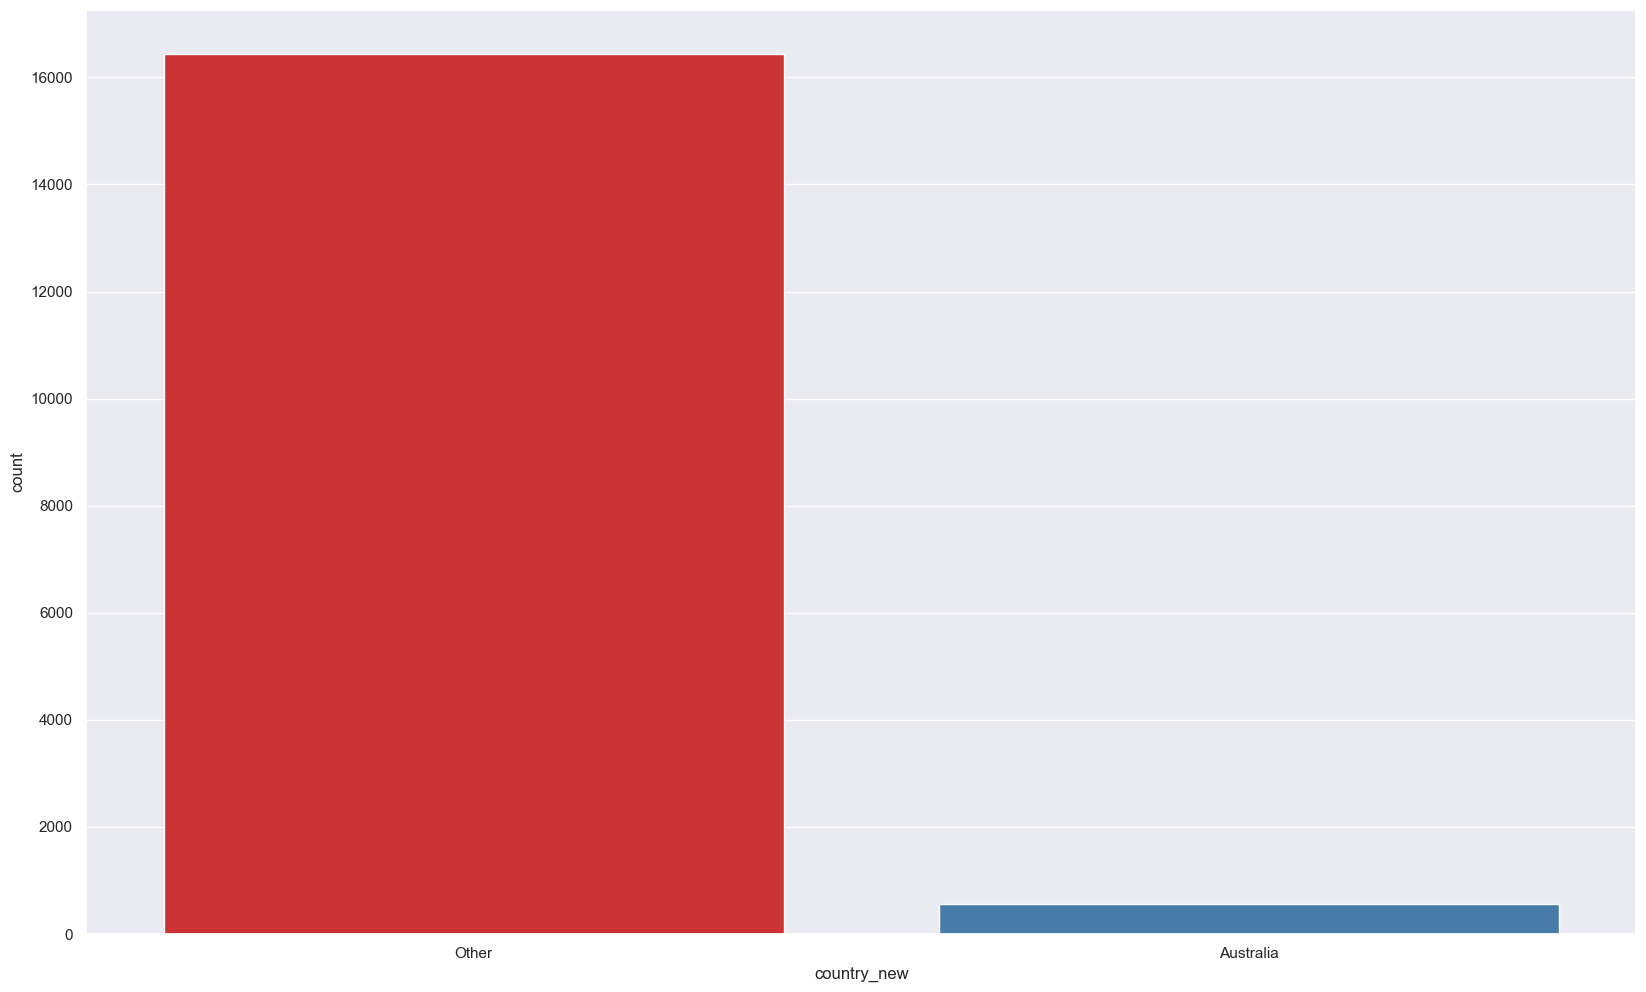

In [144]:
#test Q8
sns.countplot(x="country_new", data=rank, palette="Set1")

<div style="display: flex; background-color: RGB(100,149,237);" >
<h1 style="margin: auto; padding: 30px; ">Graphique 9 </h1>
</div>
9.un histogramme qui représente la distribution du nombre de fois où un athlète est monté sur le podium des JO, par sexe

In [ ]:
df_all_medals1.head()

,discipline_title_x,slug_game,event_title_x,event_gender,medal_type_x,participant_type_x,participant_title,athlete_url_x,athlete_full_name_x,country_name_x,...,athletes,rank_equal,rank_position,country_name_y,country_code_y,country_3_letter_code_y,athlete_url,athlete_full_name_y,value_unit,value_type
0,Freestyle Skiing,beijing-2022,Women's Moguls,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anthony,Jakara ANTHONY,Australia,...,"[('Stefania CONSTANTINI', 'https://olympics.co...",False,1,Italy,IT,ITA,NaN,NaN,NaN,NaN
1,Freestyle Skiing,beijing-2022,Women's Moguls,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anthony,Jakara ANTHONY,Australia,...,"[('Kristin SKASLIEN', 'https://olympics.com/en...",False,2,Norway,NO,NOR,NaN,NaN,NaN,NaN
2,Freestyle Skiing,beijing-2022,Women's Moguls,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anthony,Jakara ANTHONY,Australia,...,"[('Almida DE VAL', 'https://olympics.com/en/at...",False,3,Sweden,SE,SWE,NaN,NaN,NaN,NaN
3,Freestyle Skiing,beijing-2022,Women's Moguls,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anthony,Jakara ANTHONY,Australia,...,"[('Jennifer DODDS', 'https://olympics.com/en/a...",False,4,Great Britain,GB,GBR,NaN,NaN,NaN,NaN
4,Freestyle Skiing,beijing-2022,Women's Moguls,Women,GOLD,Athlete,NaN,https://olympics.com/en/athletes/anthony,Jakara ANTHONY,Australia,...,"[('Rachel HOMAN', 'https://olympics.com/en/ath...",False,5,Canada,CA,CAN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='event_gender', ylabel='count'>

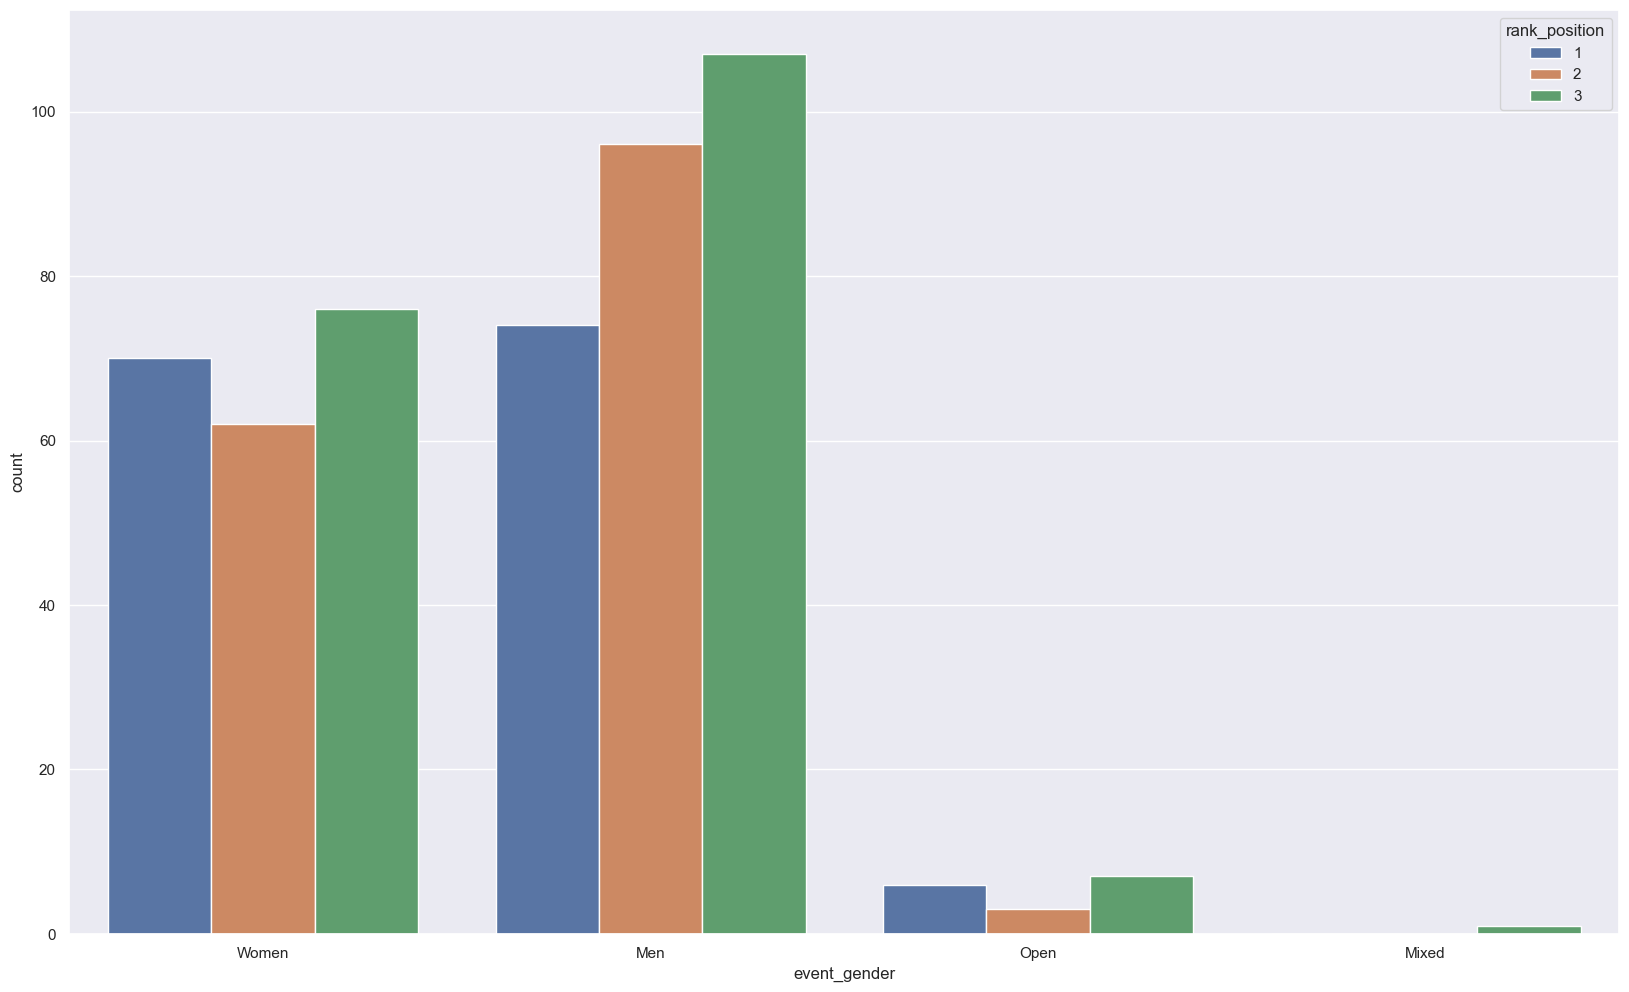

In [147]:
#sns.lineplot(data=df_all_medals1,x="event_gender",y="rank_position")
sns.countplot(data=df_all_medals1, x="event_gender", hue="rank_position")

# 10.une carte de chaleur qui représente le nombre de médailles gagnées par sport (en vertical) en fonction de l'âge moyen des participants à ce sport (en horizontal)